# ゲートつきリカレントニューラルネットワーク

# 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。


* SimpleRNN
* GRU
* LSTM
* ConvLSTM2D  
これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

In [15]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
from keras.datasets import imdb

In [14]:
# SimpleRNN

max_features = 100
# cut texts after this number of words (among top max_features most common words)
maxlen = 10
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 10)
x_test shape: (25000, 10)
Build model...
Train...


/Users/user/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 158us/step - loss: 0.6868 - accuracy: 0.5422 - val_loss: 0.6669 - val_accuracy: 0.5932
Epoch 2/5
25000/25000 [==============================] - 4s 147us/step - loss: 0.6695 - accuracy: 0.5828 - val_loss: 0.6655 - val_accuracy: 0.5964
Epoch 3/5
25000/25000 [==============================] - 3s 137us/step - loss: 0.6654 - accuracy: 0.5910 - val_loss: 0.6603 - val_accuracy: 0.5997
Epoch 4/5
25000/25000 [==============================] - 4s 141us/step - loss: 0.6629 - accuracy: 0.5928 - val_loss: 0.6618 - val_accuracy: 0.5956
Epoch 5/5
25000/25000 [==============================] - 1s 30us/step
Test score: 0.6727228979492188
Test accuracy: 0.5872399806976318


In [16]:
# GRU

max_features = 100
# cut texts after this number of words (among top max_features most common words)
maxlen = 10
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 10)
x_test shape: (25000, 10)
Build model...
Train...


/Users/user/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 325us/step - loss: 0.6694 - accuracy: 0.5749 - val_loss: 0.6604 - val_accuracy: 0.5919
Epoch 2/5
25000/25000 [==============================] - 7s 298us/step - loss: 0.6592 - accuracy: 0.5952 - val_loss: 0.6653 - val_accuracy: 0.5917
Epoch 3/5
25000/25000 [==============================] - 7s 298us/step - loss: 0.6564 - accuracy: 0.5990 - val_loss: 0.6652 - val_accuracy: 0.5887
Epoch 4/5
25000/25000 [==============================] - 7s 299us/step - loss: 0.6541 - accuracy: 0.6020 - val_loss: 0.6605 - val_accuracy: 0.5952
Epoch 5/5
25000/25000 [==============================] - 1s 52us/step
Test score: 0.6605496777725219
Test accuracy: 0.5974400043487549


In [5]:
# LSTM
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''

max_features = 100
# cut texts after this number of words (among top max_features most common words)
maxlen = 10
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 4s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 10)
x_test shape: (25000, 10)
Build model...
Train...


/Users/user/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 339us/step - loss: 0.6684 - accuracy: 0.5814 - val_loss: 0.6604 - val_accuracy: 0.5947
Epoch 2/5
25000/25000 [==============================] - 8s 306us/step - loss: 0.6577 - accuracy: 0.5982 - val_loss: 0.6602 - val_accuracy: 0.5986
Epoch 3/5
25000/25000 [==============================] - 8s 311us/step - loss: 0.6550 - accuracy: 0.6027 - val_loss: 0.6588 - val_accuracy: 0.5904
Epoch 4/5
25000/25000 [==============================] - 8s 304us/step - loss: 0.6518 - accuracy: 0.6040 - val_loss: 0.6618 - val_accuracy: 0.5943
Epoch 5/5
25000/25000 [==============================] - 2s 65us/step
Test score: 0.6536978131484985
Test accuracy: 0.5989199876785278


Train on 95 samples, validate on 5 samples
Epoch 1/5
95/95 [==============================] - 70s 733ms/step - loss: 0.8828 - val_loss: 0.6634
Epoch 2/5
95/95 [==============================] - 63s 665ms/step - loss: 0.4799 - val_loss: 0.6425
Epoch 3/5
95/95 [==============================] - 62s 653ms/step - loss: 0.3629 - val_loss: 0.6166
Epoch 4/5
95/95 [==============================] - 60s 636ms/step - loss: 0.2627 - val_loss: 0.5863
Epoch 5/5
95/95 [==============================] - 61s 641ms/step - loss: 0.1807 - val_loss: 0.5595


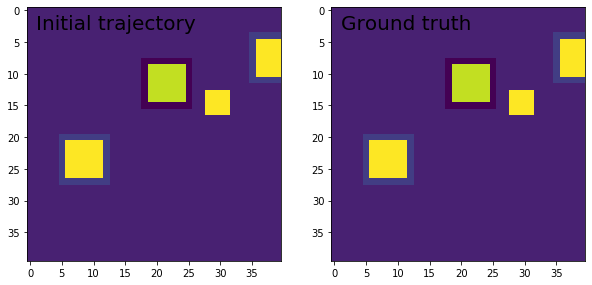

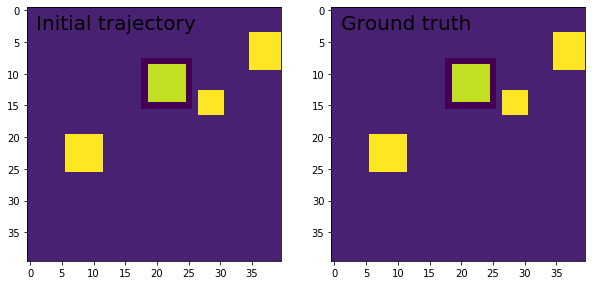

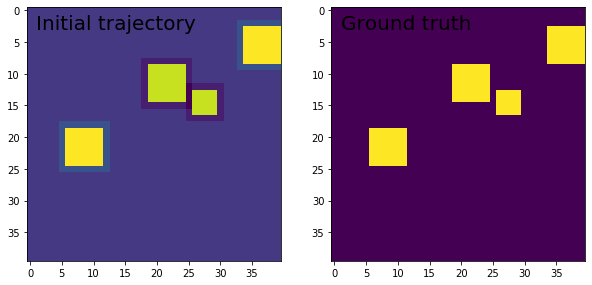

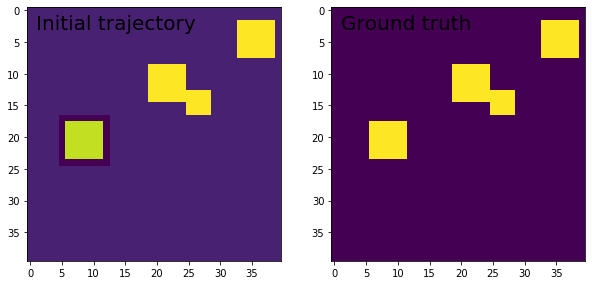

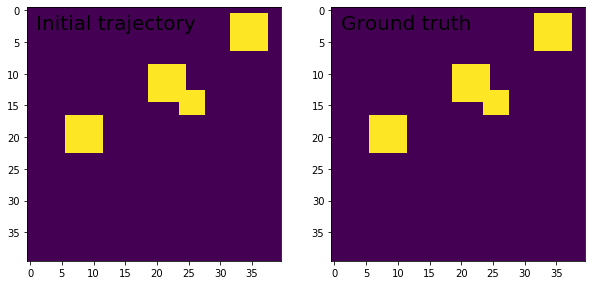

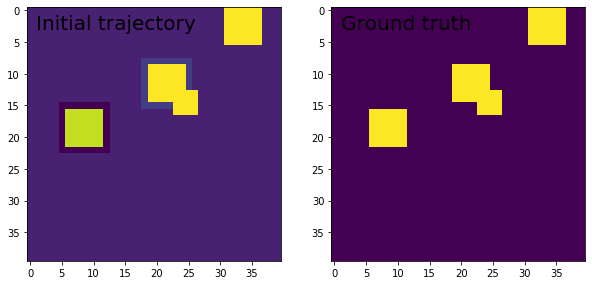

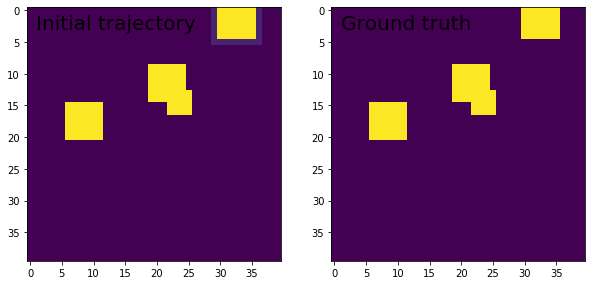

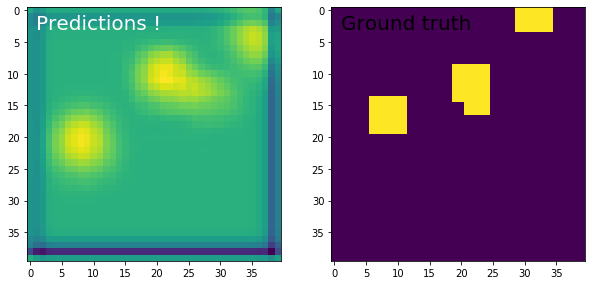

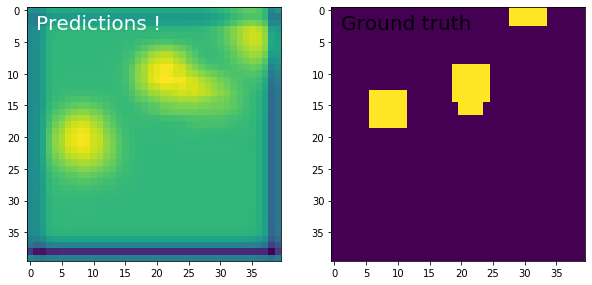

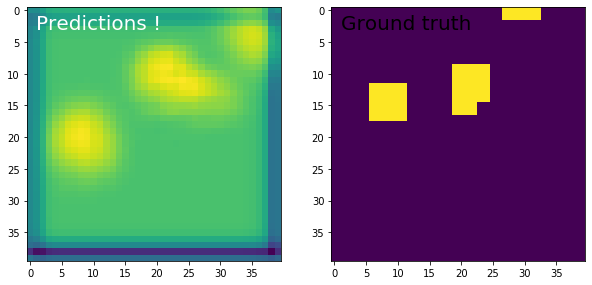

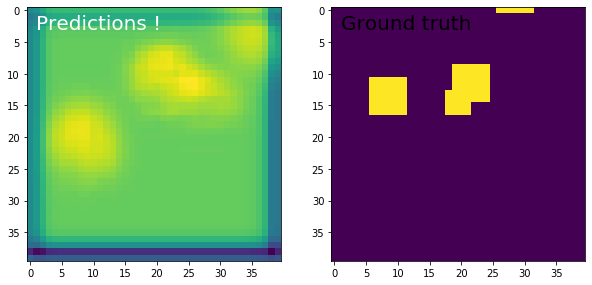

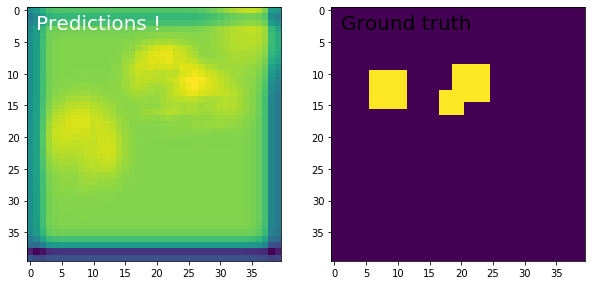

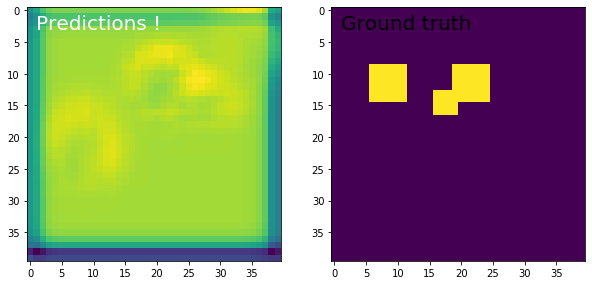

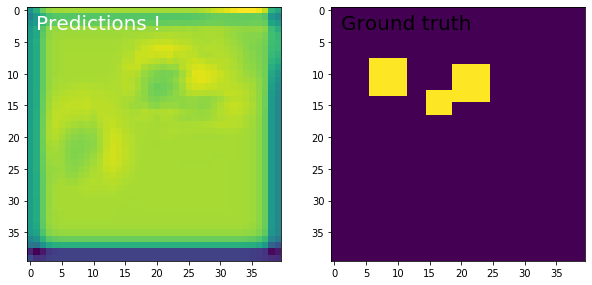

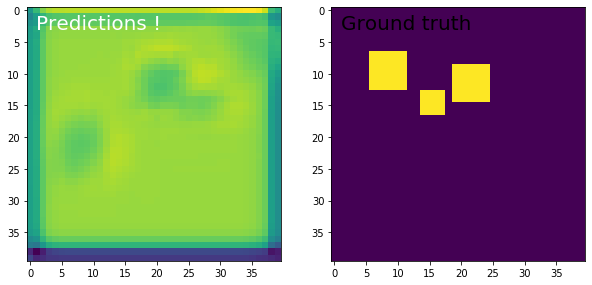

In [11]:
# ConvLSTM2D
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=100)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 54
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

* RNN  
Recurrentレイヤーに対する基底クラス

* SimpleRNNCell  
SimpleRNN層のCellクラス(セル：レイヤーのサブクラス、実際の計算コンポーネント)

* GRUCell  
GRU層のCellクラス(セル：レイヤーのサブクラス、実際の計算コンポーネント)

* LSTMCell  
 LSTM層のCellクラス(セル：レイヤーのサブクラス、実際の計算コンポーネント)

* StackedRNNCells  
RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー。  
効率的なstacked RNNを実装するために使われる。

* CuDNNGRU  
CuDNNを利用した高速なGRU実装。TensorFlowバックエンドでGPU上でのみ動作する。  
CuDNNとはNVIDIAのNN用GPU高速化ライブラリ。

* CuDNNLSTM  
CuDNNを利用した高速なLSTM実装。TensorFlowバックエンドでGPU上でのみ動作する。  
CuDNNとはNVIDIAのNN用GPU高速化ライブラリ。